In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dl-assignment/archive (3).zip (Unzipped Files)/flowers',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dl-assignment/archive (3).zip (Unzipped Files)/flowers',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3030 images belonging to 5 classes.
Found 1296 images belonging to 5 classes.


In [8]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [10]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [11]:
train_generator[31][1].shape

(32, 5)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [14]:
# %tensorflow_version 2.x
import tensorflow as tf

In [15]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 509s 26s/step - loss: 1.9483 - accuracy: 0.2014 - val_loss: 1.6070 - val_accuracy: 0.2500
Epoch 2/20
20/20 [==============================] - 137s 7s/step - loss: 1.6049 - accuracy: 0.2592 - val_loss: 1.6072 - val_accuracy: 0.2454
Epoch 3/20
20/20 [==============================] - 105s 5s/step - loss: 1.5948 - accuracy: 0.2711 - val_loss: 1.6122 - val_accuracy: 0.2153
Epoch 4/20
20/20 [==============================] - 88s 4s/step - loss: 1.5667 - accuracy: 0.2751 - val_loss: 1.5904 - val_accuracy: 0.2716
Epoch 5/20
20/20 [==============================] - 66s 3s/step - loss: 1.5765 - accuracy: 0.3282 - val_loss: 1.5823 - val_accuracy: 0.2909
Epoch 6/20
20/20 [==============================] - 57s 3s/step - loss: 1.5882 - accuracy: 0.2715 - val_loss: 1.5960 - val_accuracy: 0.2600
Epoch 7/20
20/20 [==============================] - 46s 2s/step - loss: 1.5886 - accuracy: 0.2505 - val_loss: 1.5779 - val_accuracy: 0.2894
Epoch 8/20
20/20

In [16]:
model.evaluate(validation_generator)

130/130 [==============================] - 5s 38ms/step - loss: 1.5740 - accuracy: 0.2878


[1.5740275382995605, 0.2878086566925049]

In [17]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

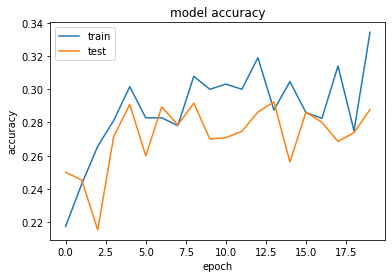

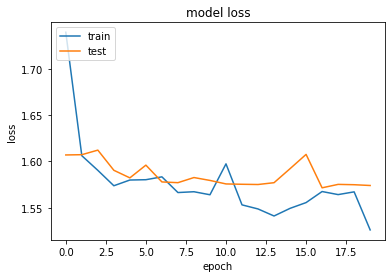

In [18]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
y_pred1 = model.predict(validation_generator)

In [20]:
y_pred1.shape

(1296, 5)

In [21]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [22]:
np.argmax(y_pred1, axis=1)[0:30]

array([1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 1, 1, 3, 1, 4, 1, 3,
       1, 1, 3, 1, 4, 1, 1, 1])

In [23]:
np.argmax(list1[0:30],axis=1)

array([2, 3, 1, 2, 0, 2, 4, 2, 3, 1, 2, 0, 2, 4, 4, 3, 3, 1, 3, 4, 2, 3,
       4, 2, 0, 1, 1, 2, 0, 2])

In [24]:
len(list1)

1296